## Visualizing PCA Transformation

- Dimension reduction finds patterns in data and uses them to re-express it in a compressed form. VERY helpful for big datasets.
- Helpful also to reduce a dataset to its 'bare bone', discarding noisy features that cause big problems for supervised learning tasks like regression or classification.
- Principal Component Analysis (PCA) is a fundamental of dimensionality reduction technique. It performs dimensionality reduction in two steps.
- First step is **de-correlation**, which doesn't change the dimensions of the data at all. We will focus on this for now.

### Decorrelation & Aligning data with axes

- Rotates data samples to be aligned with axes.
- Shifts data samples so they have mean of 0, no info is lost that way like in the example below.

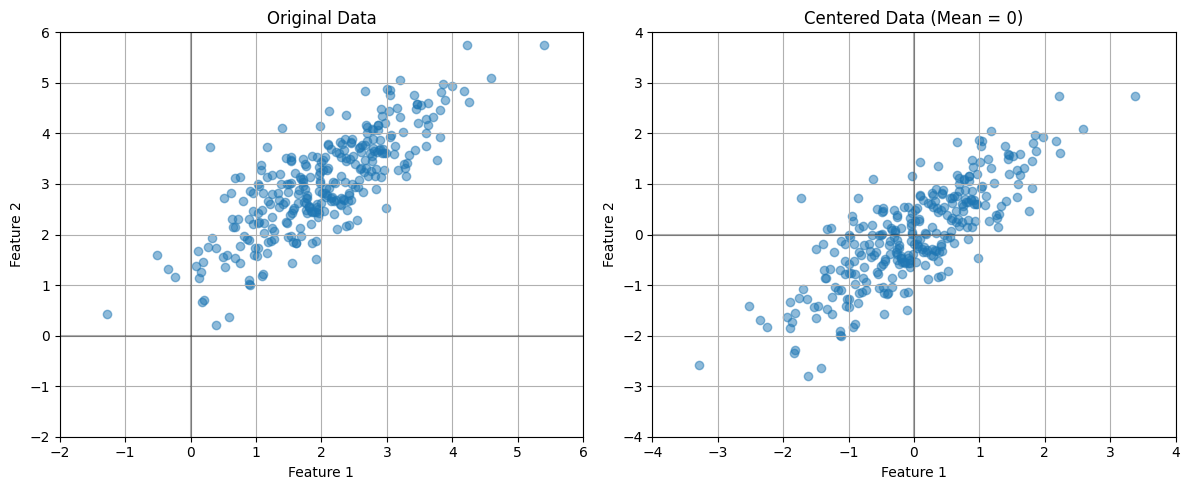

Original data mean: [2.01537093 3.00509085]
Centered data mean: [ 1.01400370e-15 -2.15827356e-15]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate correlated data
np.random.seed(42)
n_samples = 300
mean = [2, 3]  # Original mean not at zero
cov = [[1, 0.8], [0.8, 1]]  # Correlation matrix
data = np.random.multivariate_normal(mean, cov, n_samples)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data
ax1.scatter(data[:, 0], data[:, 1], alpha=0.5)
ax1.set_title('Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.grid(True)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
# Set equal axis limits for comparison
ax1.set_xlim(-2, 6)
ax1.set_ylim(-2, 6)

# Center the data (shift to mean zero)
centered_data = data - np.mean(data, axis=0)

# Plot centered data
ax2.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.5)
ax2.set_title('Centered Data (Mean = 0)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.grid(True)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
# Set equal axis limits for comparison
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)

plt.tight_layout()
plt.show()

# Print the means to verify centering
print("Original data mean:", np.mean(data, axis=0))
print("Centered data mean:", np.mean(centered_data, axis=0))


## PCA follows the fit/transform pattern

- PCA is a scikit-learn component like KMeans and StandardScaler.
- `fit()` learns the transformation from given data. `transform` applies the transformation that the fit learned. In particular, the transform method can be applied to new unseen data samples.

In [2]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(centered_data)
transformed_data = model.transform(centered_data)

print(transformed_data.shape)

(300, 2)


## PCA Features

- After fitting, the number of rows and columns stay the same.
- Rows of transformed correspond to samples.
- Columns of transformed are the 'PCA features', meaning that the columns can be reduced to a smaller number of important features.
- Row gives PCA feature values of corresponding sample.
- PCA features decorrelates since it transforms the values with mean 0. You may measure linear correlation using the Pearson correlation coefficient. It takes values between -1 and 1, where larger values indicate stronger correlation and 0 states no correlation.
- PCA is called 'principal component analysis' because it learns the 'principal components' of the data. These are the directions in which the samples vary the most. It is the principal components that PCA aligns with the coordinate axes.

**Basically** PCA creates new features that are intentionally uncorrelated with each other (decorrelated step). The importance of each feature isn't measured by correlation (because they are already decorrelated), but by the variance of the data along the principal components.

Think of it like this: the first principal component is the direction where you data varies the most, the second component is the next more varying directions (perpendicular to the first), and so on. 

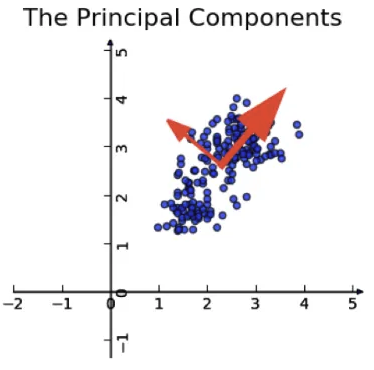

Variance matters because it tells you how much information is in the data. High variance means that our dataset is more spread out and more information is present, low variance means that the data is more clustered and less information is present. We rank our new PCA features based on which feature contains the most variance.

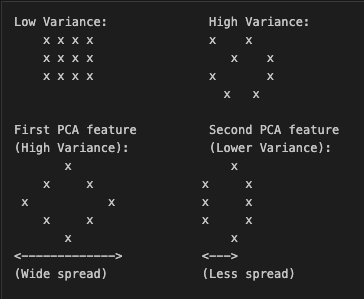

## Intrinsic Dimension 

- New dataset of 2 features: longitude and latitude at points along a flight path.
- Dataset appears to have 2 dimensions, but it is actually 1-dimensional or 1 feature: the displacement along the path. Therefore, this dataset is said to have an intrinsic dimension of 1.
- Intrinsic dimension = number of features needed to describe the dataset. In this case, you can approximate the dataset with a single value even though it has 2 features.
- It is the essential idea behind dimensionality reduction because it tells how much we can compress the data.

## Versicolor Dataset 

- 'versicolor', one of the three iris species.
- Only 3 features: sepal length, sepal width, and petal width.
- Samples are points in a 3-dimensional space.

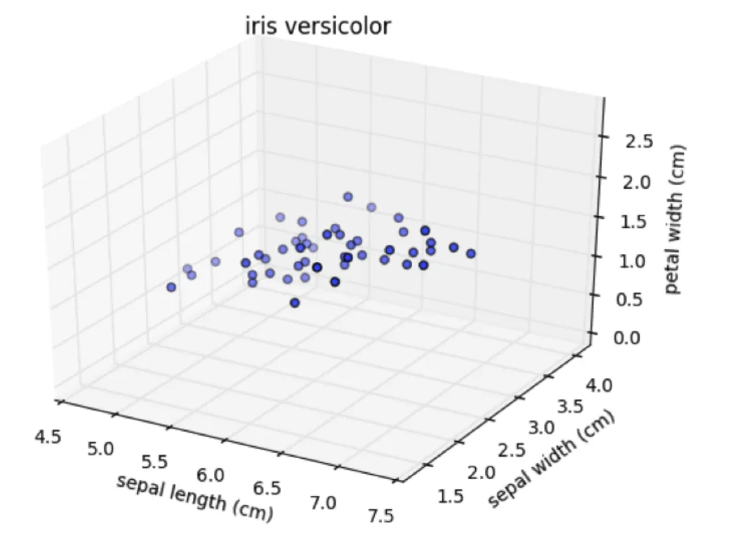

- But in the 3D scatter plot, we see that they all lie very close to a flat 2D sheet. This means in data can be approximated by using only 2 features without losing too much information. So the intrinsic dimension of this dataset is 2.

## PCA identifies the intrinsic dimension

- Scatter plots are only possible if there are 3 or fewer features. So how can the intrinsic dimension be visualized when there are more than 3 features?
- This is where PCA is really useful. It can be identified by counting the PCA feature that have HIGH variance.
- PCA rotates and shifts the samples to align them with the coordinate axes. This expresses the samples using 3 PCA features.

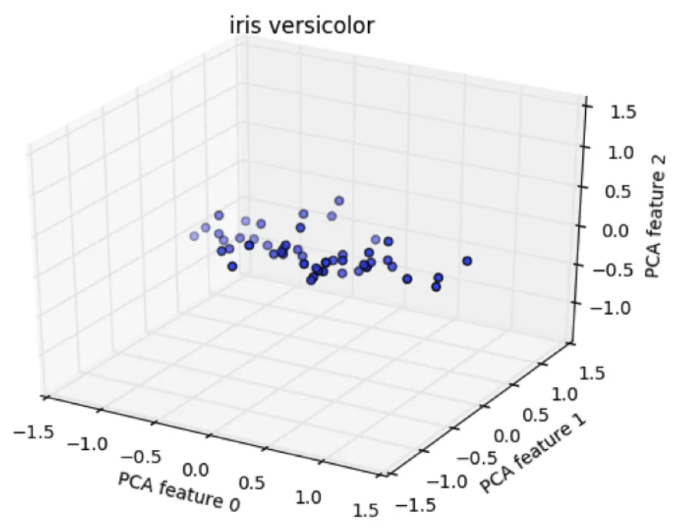

- The PCA features are in a special order. In the graph below it shows the variance of each PCA features. Each PCA feature has less variance than the previous one, and in this case the last PCA feature has a very low variance.
- This agrees with the scatter plot of the PCA features, where the samples don't vary much in the vertical direction. In the other two directions, however, the variance is apparent.

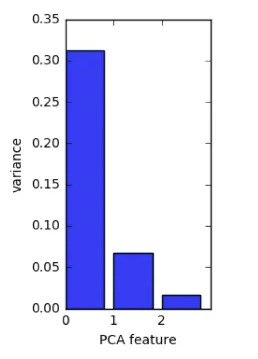


## Dimension Reduction with PCA

- Represents same data using less features.
- Important part of machine learning pipelines when working with real-world datasets.
- PCA features are in a decreasing order of variance. In code, we can specify how many features we want to keep. `PCA(n_components=2)` will keep the first two PCA features. A good choice is the intrinsic dimension of the dataset if you know it...

### Dimension Reduction of Iris Dataset

- `samples` = array of iris measurements (4 features).
- `species` = list of iris species numbers.

(150, 2)


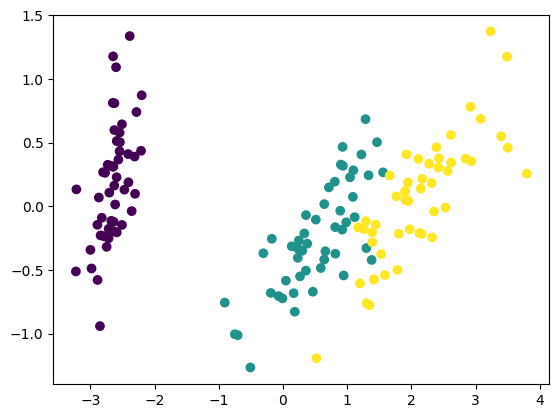

In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
samples = iris.data
species = iris.target

pca = PCA(n_components=2)
pca.fit(samples)
transformed = pca.transform(samples)

print(transformed.shape)

import matplotlib.pyplot as plt

xs = transformed[:, 0]
ys = transformed[:, 1]

plt.scatter(xs, ys, c=species)
plt.show()

- In the scatter plot above of two PCA features, where the colors represent the 3 species of iris. Remarkably, despite having reduced the dimension from 4 to 2, the species can still be distinguished.
- Remember that PCA didn't even know that there are different species but still managed to distinguish them by taking 2 features with the highest variance.